<a href="https://colab.research.google.com/github/vvrgit/Aquaculture/blob/main/Aquaculture_DNN_Spec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam,Adamax,Nadam
#import pylab as plt
#import seaborn as sns #For data visualization
import pandas as pd # For Data manipulation

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [4]:
dataframe = pd.read_excel("/content/Fish_Species_Outlier_Removed.xlsx")
dataframe.head()

,ph,temperature,turbidity,fish
0,7.1,10.0,6.0,0
1,7.2,15.0,7.0,0
2,7.3,20.0,8.0,0
3,7.5,25.0,9.0,0
4,7.4,26.0,10.0,0


In [5]:
dataframe.describe()

,ph,temperature,turbidity,fish
count,182.000000,182.000000,182.000000,182.000000
mean,7.219231,22.138681,4.611374,1.664835
std,0.627357,4.147318,2.198007,1.073423
min,6.000000,8.000000,3.560000,0.000000
25%,6.905000,21.120000,3.570000,1.000000
50%,7.240000,21.250000,3.610000,2.000000
75%,7.600000,21.440000,4.000000,3.000000
max,8.800000,35.000000,14.800000,3.000000


In [6]:
dataset = dataframe.values
X = dataset[0:,0:3].astype(float)
Y = dataset[0:,3]

In [7]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_norm=ms.fit_transform(X)

In [8]:
import tensorflow as tf

y_class=tf.keras.utils.to_categorical(Y,num_classes=4)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_class, test_size=0.1, random_state=0)

In [10]:
len(X_test)
len(X_train)

163

In [11]:
First_Layer_Size =18 # Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='relu', input_shape=(3,)))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 18)             │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832 (3.25 KB)

 Trainable params: 832 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/500
3/3 - 3s - 1s/step - accuracy: 0.1595 - loss: 1.3884 - val_accuracy: 0.2105 - val_loss: 1.3828
Epoch 2/500
3/3 - 0s - 98ms/step - accuracy: 0.3313 - loss: 1.3791 - val_accuracy: 0.2105 - val_loss: 1.3804
Epoch 3/500
3/3 - 0s - 41ms/step - accuracy: 0.3313 - loss: 1.3728 - val_accuracy: 0.2105 - val_loss: 1.3785
Epoch 4/500
3/3 - 0s - 47ms/step - accuracy: 0.3313 - loss: 1.3646 - val_accuracy: 0.2105 - val_loss: 1.3766
Epoch 5/500
3/3 - 0s - 25ms/step - accuracy: 0.3313 - loss: 1.3586 - val_accuracy: 0.2105 - val_loss: 1.3752
Epoch 6/500
3/3 - 0s - 23ms/step - accuracy: 0.3313 - loss: 1.3536 - val_accuracy: 0.2105 - val_loss: 1.3742
Epoch 7/500
3/3 - 0s - 22ms/step - accuracy: 0.3313 - loss: 1.3485 - val_accuracy: 0.2105 - val_loss: 1.3730
Epoch 8/500
3/3 - 0s - 24ms/step - accuracy: 0.3313 - loss: 1.3433 - val_accuracy: 0.2105 - val_loss: 1.3718
Epoch 9/500
3/3 - 0s - 24ms/step - accuracy: 0.3313 - loss: 1.3389 - val_accuracy: 0.2105 - val_loss: 1.3708
Epoch 10/500
3/3 - 0s

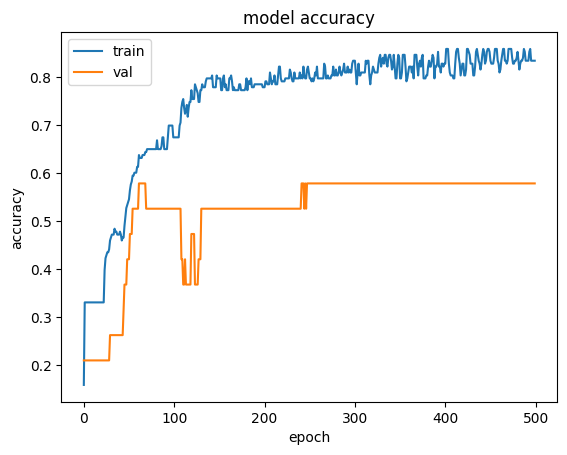

In [13]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train,y_train,validation_data=[X_test,y_test], batch_size=64,epochs=500,verbose=2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
model.save('Fish_Spech_64.h5')

In [23]:
# Load the model
fish=["Karpio","Katla","Shrimp","Silver-Cap"]
try:
    model = tf.keras.models.load_model("Fish_Spech_64.h5")
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    model = None # Set model to None if loading fails

pH=float(input("enter pH Value"))
Temperature=float(input("enter Temperature Value"))
Turbidity=float(input("enter Turbidity Value"))
ip=np.array([[pH,Temperature,Turbidity]]) # Reshape input to (1, 3)

if model is not None:
    # Make predictions
    y_pred_test = np.argmax(model.predict(ip), axis=1) # Predict on the single input
    print("Predictions:")
    print(fish[y_pred_test[0]]) # Access the single element of the array to get the integer index
else:
    print("Model not available for prediction.")

Model loaded successfully!
enter pH Value10
enter Temperature Value20
enter Turbidity Value30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Predictions:
Shrimp


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


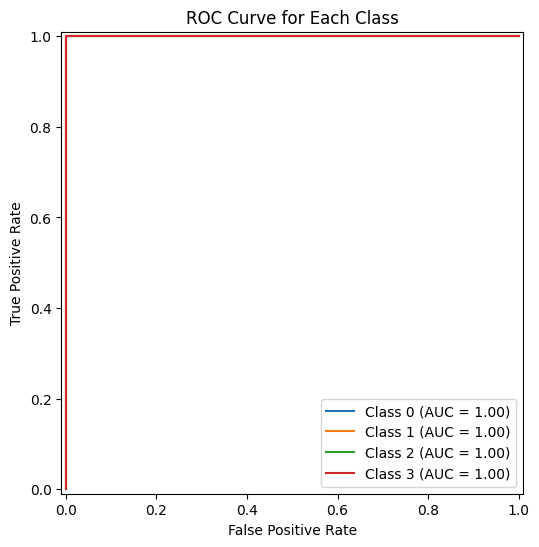

In [15]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for the test set
y_prob = model.predict(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test.shape[1]):
    RocCurveDisplay.from_predictions(y_test[:, i], y_test[:, i], name=f'Class {i}', ax=plt.gca())

plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6872 - loss: 0.5658
Test loss: 0.5402199625968933
Test accuracy: 0.7027027010917664


In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_test[35].reshape(1,3))
print(prediction[0])
print(np.round(prediction[0]))
print(y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[2.0646844e-06 1.3979817e-03 1.0608016e-01 8.9251983e-01]
[0. 0. 0. 1.]
[0. 0. 1. 0.]


In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_test)
print(prediction)
print(np.round(prediction))
print(y_test)
y_pred=np.round(prediction)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step 
[[4.19746975e-05 1.24724032e-02 5.22965312e-01 4.64520425e-01]
 [9.82371986e-01 4.78192108e-09 1.75723396e-02 5.56433479e-05]
 [3.54489785e-05 9.90421116e-01 1.71224342e-03 7.83120375e-03]
 [7.19473683e-05 2.87970919e-02 5.64449012e-01 4.06681955e-01]
 [1.33475900e-04 8.99769783e-01 4.61602546e-02 5.39366156e-02]
 [6.42548330e-05 3.74244042e-02 5.54143846e-01 4.08367366e-01]
 [9.99297559e-01 1.50734198e-08 5.03786316e-04 1.98734226e-04]
 [4.53047069e-05 1.44350994e-02 5.67928731e-01 4.17590886e-01]
 [9.92290879e-05 9.70936537e-01 1.10404743e-02 1.79238003e-02]
 [1.98576570e-04 7.66791701e-01 1.17032565e-01 1.15977213e-01]
 [1.11561425e-01 1.10694185e-01 7.48037128e-03 7.70264030e-01]
 [4.19746975e-05 1.24724032e-02 5.22965312e-01 4.64520425e-01]
 [5.25803516e-05 2.01218426e-02 5.66441834e-01 4.13383812e-01]
 [1.34829745e-01 4.42294031e-03 3.30130075e-04 8.60417187e-01]
 [1.28350648e-05 5.42771397e-03 3.07998091e-01 6.86561286e-01]
 [4.53047069e-05

In [ ]:
# Load the model architecture
model = tf.keras.models.load_model("/content/Fish_Spech_16.h5")

# Load the weights
model.load_weights("/content/Fish_Spech_16.weights.h5")

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_train)
y_pred_train=np.round(prediction)
prediction = model.predict(X_test)
y_pred_test=np.round(prediction)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


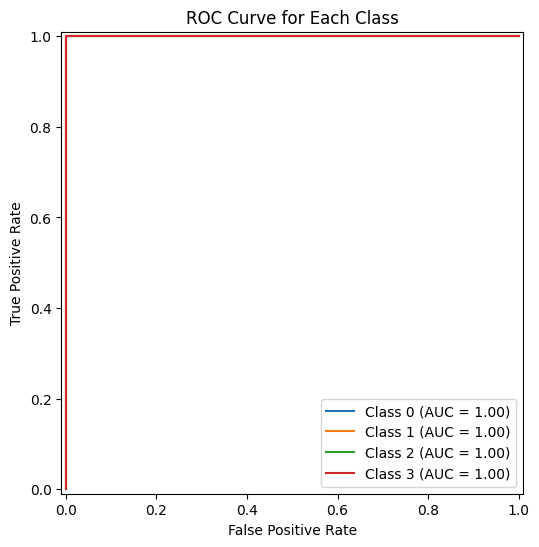

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for the test set
y_prob = model.predict(X_test)
y_pred_test=np.round(y_prob)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test.shape[1]):
    RocCurveDisplay.from_predictions(y_test[:, i], y_test[:, i], name=f'Class {i}', ax=plt.gca())

plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
print(y_prob)

[[2.8286293e-09 8.3893774e-06 9.8787278e-01 1.2118835e-02]
 [9.9998194e-01 2.1315164e-14 1.7994771e-05 3.5740030e-08]
 [2.5544793e-19 9.9934745e-01 6.5213564e-04 3.4896468e-07]
 [1.7379920e-05 2.3775467e-06 5.4974413e-01 4.5023611e-01]
 [1.1167652e-06 7.4862832e-01 3.3103622e-02 2.1826692e-01]
 [7.7308685e-04 1.3935854e-10 5.9462399e-03 9.9328065e-01]
 [9.9999815e-01 1.2896682e-15 5.7258427e-07 1.2027667e-06]
 [1.4489463e-05 1.4636836e-10 2.6198512e-02 9.7378695e-01]
 [3.1689353e-11 9.9530643e-01 1.9045720e-03 2.7891067e-03]
 [2.4392483e-08 9.2272115e-01 5.7118125e-02 2.0160744e-02]
 [9.7814423e-01 7.6998310e-09 1.2349904e-05 2.1843370e-02]
 [2.8286293e-09 8.3893774e-06 9.8787278e-01 1.2118835e-02]
 [1.2634229e-04 1.3495009e-10 1.2492414e-02 9.8738116e-01]
 [5.9593260e-01 6.5168635e-08 1.7542696e-06 4.0406552e-01]
 [2.0371024e-13 4.7725543e-12 1.3284626e-02 9.8671526e-01]
 [1.4489463e-05 1.4636836e-10 2.6198512e-02 9.7378695e-01]
 [6.3605441e-08 7.7863687e-01 2.0295285e-01 1.8410183e-0

In [16]:
from sklearn.metrics import classification_report


print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19
 samples avg       1.00      1.00      1.00        19



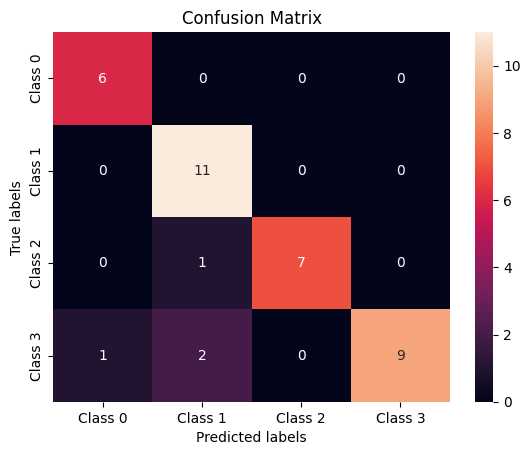

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_test are available from previous cells
# If not, you might need to run the prediction step first
# y_pred_test = np.round(model.predict(X_test)) # Uncomment if needed


cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred_test).argmax(axis=1))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
# Assuming 4 classes based on the dataset description in previous cells
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
ax.xaxis.set_ticklabels(class_labels); ax.yaxis.set_ticklabels(class_labels);
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9310
Test Accuracy: 0.8919


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (3).

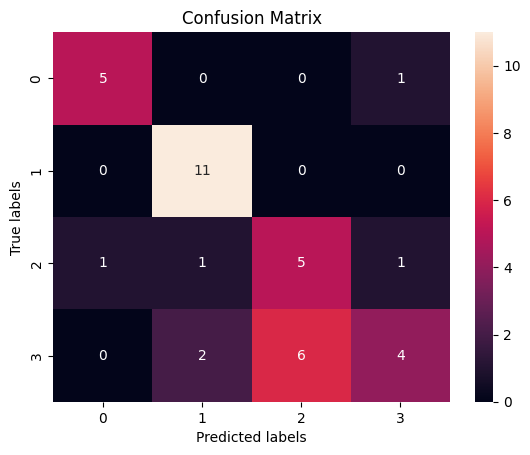

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_train)
print(prediction)
print(np.round(prediction))
print(y_train)
y_pred_train=np.round(prediction)

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[1.6630656e-18 9.9408674e-01 5.9131025e-03]
 [9.7001994e-01 3.6288779e-16 2.9980086e-02]
 [9.9934596e-01 2.7979022e-18 6.5403490e-04]
 ...
 [3.2133026e-13 9.8204243e-01 1.7957563e-02]
 [5.4090054e-15 9.9424571e-01 5.7543432e-03]
 [1.0271256e-15 9.3440264e-01 6.5597326e-02]]
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


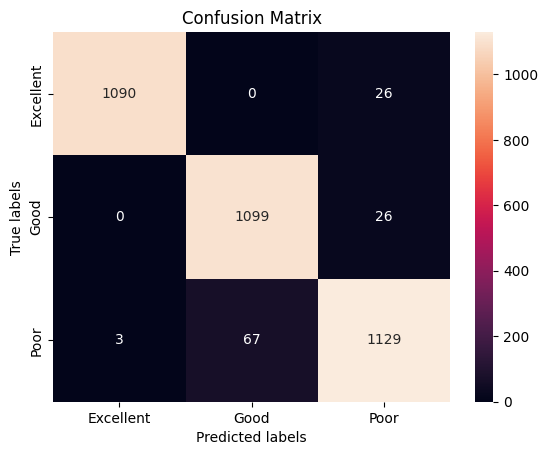

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_train).argmax(axis=1), np.asarray(y_pred_train).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1116
           1       0.94      0.98      0.96      1125
           2       0.96      0.94      0.95      1199

   micro avg       0.96      0.96      0.96      3440
   macro avg       0.97      0.97      0.97      3440
weighted avg       0.96      0.96      0.96      3440
 samples avg       0.96      0.96      0.96      3440



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       284
           1       0.88      0.95      0.91       275
           2       0.93      0.88      0.90       301

   micro avg       0.93      0.93      0.93       860
   macro avg       0.93      0.93      0.93       860
weighted avg       0.94      0.93      0.93       860
 samples avg       0.93      0.93      0.93       860



# **Decision Tree Classifier**

In [ ]:
dataframe = pd.read_excel("/content/drive/MyDrive/AI Data/WQD.xlsx")
dataframe.head()

,Unnamed: 0,ph,temperature,turbidity,fish
0,0,7.0,5.0,5.0,0
1,1,7.1,10.0,6.0,0
2,2,7.2,15.0,7.0,0
3,3,7.3,20.0,8.0,0
4,4,7.5,25.0,9.0,0


In [ ]:
dataset = dataframe.values
X = dataset[0:,0:14].astype(float)
Y = dataset[0:,14]
print(X[0:])

[[6.74487248e+01 1.01271479e+01 2.08152598e-01 ... 5.98351962e-03
  6.67928501e-02 6.06962402e+03]
 [6.46266660e+01 9.40155952e+01 1.14344627e+01 ... 4.90608990e-03
  2.34279599e-02 2.50995959e+02]
 [6.51218418e+01 9.06534623e+01 1.24308647e+01 ... 6.97923428e-03
  6.50410879e-02 7.21892747e+03]
 ...
 [2.69684218e+01 4.48454162e+01 4.30993492e+00 ... 7.26881067e-01
  1.91076819e-02 3.81644394e+03]
 [2.45230924e+01 5.71285964e+01 4.74361524e+00 ... 8.27799313e-01
  1.99046121e-02 3.58098936e+03]
 [2.44348471e+01 7.62218150e+01 4.42584598e+00 ... 8.91224283e-01
  1.92648940e-02 3.58423414e+03]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(y_test[0:5])
print(X_train)

[1. 1. 1. 0. 2.]
[[1.73755704e+01 2.63431284e+01 6.62715284e+00 ... 1.65547545e-02
  4.76781622e-03 2.42083851e+03]
 [2.89661728e+01 7.60693402e+01 4.90103767e+00 ... 1.27580700e+00
  1.96077244e-02 4.27425925e+03]
 [2.84048525e+01 7.60043648e+01 4.79566578e+00 ... 1.63374021e+00
  1.91863177e-02 4.48247188e+03]
 ...
 [1.76824611e+01 2.13668260e+01 5.92176734e+00 ... 1.02384052e-02
  9.47425029e-03 5.59061320e+03]
 [3.10239282e+01 1.95276675e+01 6.09354760e+00 ... 1.55825623e-02
  1.45068442e-02 2.71608710e+03]
 [1.71008791e+01 2.13138237e+01 6.44168496e+00 ... 2.92066316e-02
  1.43776820e-02 4.86558247e+03]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9965116279069768


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 1.0


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9965116279069768


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 1.0


# **SVC**

In [ ]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy for X_test
accuracy = svm_model_linear.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [ ]:
# model accuracy for X_test
train_accuracy = svm_model_linear.score(X_test, y_test)
test_accuracy = svm_model_linear.score(X_train, y_train)


# Model Accuracy, how often is the classifier correct?
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)

train_accuracy: 0.7953488372093023
test_accuracy: 0.8061046511627907


In [ ]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print(cm)

[[280   0   4]
 [  0 228  47]
 [ 42  83 176]]


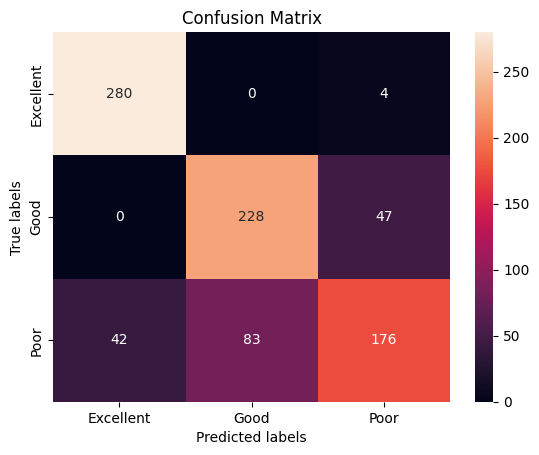

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
svm_predictions = svm_model_linear.predict(X_test)
svm_predictions_train = svm_model_linear.predict(X_train)



from sklearn.metrics import classification_report
print(classification_report(y_train, svm_predictions_train))

from sklearn.metrics import classification_report
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1116
         1.0       0.75      0.86      0.80      1125
         2.0       0.81      0.58      0.68      1199

    accuracy                           0.81      3440
   macro avg       0.81      0.81      0.80      3440
weighted avg       0.81      0.81      0.80      3440

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92       284
         1.0       0.73      0.83      0.78       275
         2.0       0.78      0.58      0.67       301

    accuracy                           0.80       860
   macro avg       0.79      0.80      0.79       860
weighted avg       0.79      0.80      0.79       860



# **KNN**

In [ ]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

KNN_predictions_test = knn.predict(X_test)
KNN_predictions_train = knn.predict(X_train)

# accuracy on X_test
accuracy = knn.score(X_test, y_test)

# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)

In [ ]:
# model accuracy for X_test
train_accuracy = knn.score(X_test, y_test)
test_accuracy = knn.score(X_train, y_train)


# Model Accuracy, how often is the classifier correct?
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)

train_accuracy: 0.7488372093023256
test_accuracy: 0.7997093023255814


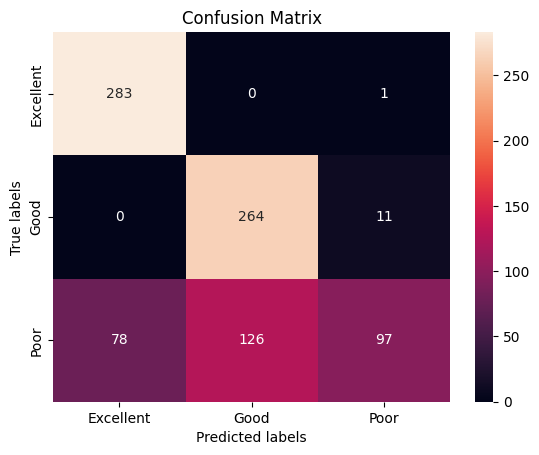

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(y_test, KNN_predictions_test)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

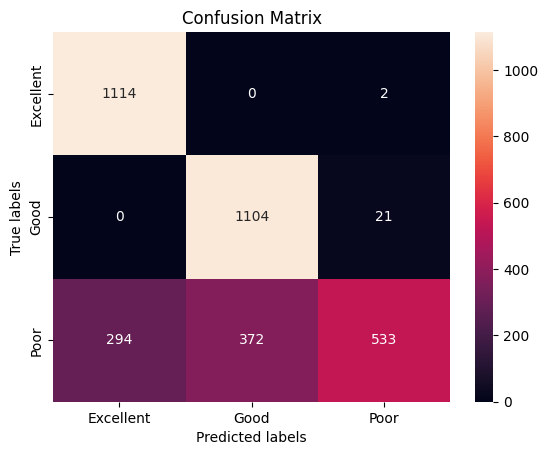

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(y_train, KNN_predictions_train)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
knn_predictions = knn.predict(X_test)
knn_predictions_train = knn.predict(X_train)



from sklearn.metrics import classification_report
print(classification_report(y_train, knn_predictions_train))

from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1116
         1.0       0.75      0.98      0.85      1125
         2.0       0.96      0.44      0.61      1199

    accuracy                           0.80      3440
   macro avg       0.83      0.81      0.78      3440
weighted avg       0.84      0.80      0.78      3440

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       284
         1.0       0.68      0.96      0.79       275
         2.0       0.89      0.32      0.47       301

    accuracy                           0.75       860
   macro avg       0.78      0.76      0.71       860
weighted avg       0.79      0.75      0.71       860



# **Naive**

In [ ]:
# training a KNN classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

gnb_predictions_test = gnb.predict(X_test)
gnb_predictions_train = gnb.predict(X_train)


In [ ]:
# model accuracy for X_test
train_accuracy = gnb.score(X_test, y_test)
test_accuracy = gnb.score(X_train, y_train)


# Model Accuracy, how often is the classifier correct?
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)

train_accuracy: 0.877906976744186
test_accuracy: 0.8906976744186047


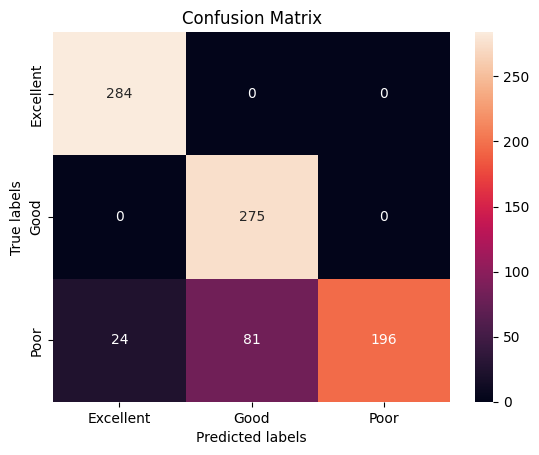

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(y_test, gnb_predictions_test)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

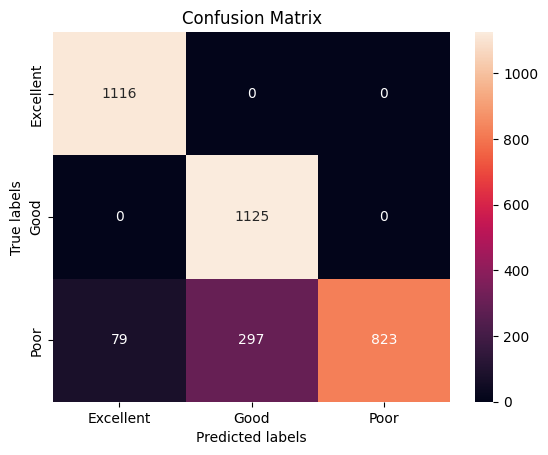

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(y_train, gnb_predictions_train)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
gnb_predictions_test = gnb.predict(X_test)
gnb_predictions_train = gnb.predict(X_train)



from sklearn.metrics import classification_report
print(classification_report(y_train, gnb_predictions_train))

from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_predictions_test))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97      1116
         1.0       0.79      1.00      0.88      1125
         2.0       1.00      0.69      0.81      1199

    accuracy                           0.89      3440
   macro avg       0.91      0.90      0.89      3440
weighted avg       0.91      0.89      0.89      3440

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       284
         1.0       0.77      1.00      0.87       275
         2.0       1.00      0.65      0.79       301

    accuracy                           0.88       860
   macro avg       0.90      0.88      0.87       860
weighted avg       0.90      0.88      0.87       860



# **Load Model**

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('aqua_dnn.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 17)                  │             255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,229 (4.80 KB)

 Trainable params: 1,227 (4.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Write the index of the test sample to test
prediction = new_model.predict(X_test[35].reshape(1,14))
print(prediction[0])
print(np.round(prediction[0]))
print(y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[0. 0. 1.]
[0. 0. 1.]
1.0


In [ ]:
list_of_columns = ['Temp','Turbidity','DO','BOD','CO2','pH','Alkalinity','Hardness','Calcium','Ammonia','Nitrite','Phosphorus','H2S','Plankton']
input_data=pd.DataFrame(columns=list_of_columns)

input_data.at[0, 'Temp'] = (float(input('enter Temp'))-0.194046)/(84.251522-0.194046)
input_data.at[0, 'Turbidity'] = (float(input('enter Turbidity'))-0.051424)/(99.797743-0.051424)
input_data.at[0, 'DO'] = (float(input('enter DO'))-0.133928)/(14.970122-0.133928)
input_data.at[0, 'BOD'] = (float(input('enter BOD'))-1.000621)/(14.943006-1.000621)
input_data.at[0, 'CO2'] = (float(input('enter CO2'))-0.001155)/(14.984216-0.001155)
input_data.at[0, 'pH'] = (float(input('enter pH'))-0.003944)/(14.851195-0.003944)
input_data.at[0, 'Alkalinity'] = (float(input('enter Alkalinity'))-25.012328)/(299.913160-25.012328)
input_data.at[0, 'Hardness'] = (float(input('enter Hardness'))-0.255805	)/(398.796550-0.255805)
input_data.at[0, 'Calcium'] = (float(input('enter Calcium'))-0.018293)/(399.321398-0.018293)
input_data.at[0, 'Ammonia'] = (float(input('enter Ammonia'))-0)/(0.999300)
input_data.at[0, 'Nitrite'] = (float(input('enter Nitrite'))-0)/(4.989535)
input_data.at[0, 'Phosphorus'] = (float(input('enter Phosphorus'))-0.000128)/(4.974457-0.000128)
input_data.at[0, 'H2S'] = (float(input('enter H2S'))-0)/0.099220
input_data.at[0, 'Plankton'] = (float(input('enter Plankton'))-78.603733)/(7460.415789-78.603733)


enter Temp67
enter Turbidity10
enter DO0.2
enter BOD7.4
enter CO210.18
enter pH4.7
enter Alkalinity218
enter Hardness300
enter Calcium337
enter Ammonia0.286
enter Nitrite4.355
enter Phosphorus0.006
enter H2S0.067
enter Plankton6070


In [ ]:
data=np.array(input_data[0:])
data

array([[0.7947651675860455, 0.09973877833025598, 0.004453433272711318,
        0.45898739706298464, 0.6793568417027736, 0.31629127843262034,
        0.702026511145663, 0.7521042672813791, 0.8439245845583896,
        0.2862003402381667, 0.872826826547965, 0.0011804607214359968,
        0.6752670832493449, 0.8116430249846502]], dtype=object)

In [ ]:
y_tensor = tf.convert_to_tensor(data, dtype=tf.int64)
prediction = new_model.predict(y_tensor)
ind=np.argmax(prediction)
if(ind==0):
  print("Excellent")
if(ind==1):
  print("Good")
if(ind==2):
  print("Poor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Poor


#DNN With Fish Sperc

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Define K-Fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
acc_scores = []

In [ ]:
dataframe = pd.read_excel("/content/Realfish-Karpio-Katla-Shrimp-Silver.xlsx")
dataframe.head()

,ph,temperature,turbidity,fish
0,7.0,5.0,5.0,0
1,7.1,10.0,6.0,0
2,7.2,15.0,7.0,0
3,7.3,20.0,8.0,0
4,7.5,25.0,9.0,0


In [ ]:
dataframe.describe()

,ph,temperature,turbidity,fish
count,196.000000,196.000000,196.000000,196.000000
mean,7.244388,21.970612,5.230408,1.647959
std,0.615853,4.758569,3.210306,1.063881
min,6.000000,4.000000,3.560000,0.000000
25%,6.920000,21.120000,3.600000,1.000000
50%,7.260000,21.250000,3.610000,2.000000
75%,7.600000,21.500000,5.500000,3.000000
max,8.800000,35.000000,15.800000,3.000000


In [ ]:
dataset = dataframe.values
X = dataset[0:,0:3].astype(float)
Y = dataset[0:,3]
print(Y[0:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3.]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
red_wine_data_X=ms.fit_transform(X)
print(red_wine_data_X)

[[3.57142857e-01 3.22580645e-02 1.17647059e-01]
 [3.92857143e-01 1.93548387e-01 1.99346405e-01]
 [4.28571429e-01 3.54838710e-01 2.81045752e-01]
 [4.64285714e-01 5.16129032e-01 3.62745098e-01]
 [5.35714286e-01 6.77419355e-01 4.44444444e-01]
 [5.00000000e-01 7.09677419e-01 5.26143791e-01]
 [3.57142857e-01 7.74193548e-01 1.58496732e-01]
 [3.92857143e-01 8.38709677e-01 2.40196078e-01]
 [4.28571429e-01 2.58064516e-01 3.21895425e-01]
 [4.64285714e-01 2.90322581e-01 4.03594771e-01]
 [5.35714286e-01 3.22580645e-01 4.85294118e-01]
 [5.00000000e-01 4.51612903e-01 1.33986928e-01]
 [3.57142857e-01 5.80645161e-01 2.15686275e-01]
 [3.92857143e-01 8.70967742e-01 2.97385621e-01]
 [4.28571429e-01 4.83870968e-01 3.79084967e-01]
 [4.64285714e-01 9.67741935e-02 4.60784314e-01]
 [5.35714286e-01 1.29032258e-01 1.42156863e-01]
 [5.00000000e-01 1.61290323e-01 2.23856209e-01]
 [3.57142857e-01 2.25806452e-01 3.05555556e-01]
 [3.92857143e-01 3.87096774e-01 3.87254902e-01]
 [4.28571429e-01 4.19354839e-01 4.689542

In [ ]:
import tensorflow as tf

y_train=tf.keras.utils.to_categorical(Y,num_classes=4)
print(y_train)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(red_wine_data_X, y_train, test_size=0.2, random_state=0)

In [ ]:
First_Layer_Size =18 # Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='relu', input_shape=(3,)))
model.add(Dense(First_Layer_Size,activation='relu'))
model.add(Dense(First_Layer_Size,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)               │ (None, 18)             │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 4)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832 (3.25 KB)

 Trainable params: 832 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CKPT_path = "Fish_Spech_64.weights.h5"
callbacks = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True, save_weights_only=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - accuracy: 0.2650 - loss: 1.3926 - val_accuracy: 0.1875 - val_loss: 1.4126
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2952 - loss: 1.3875 - val_accuracy: 0.1875 - val_loss: 1.4037
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3244 - loss: 1.3826 - val_accuracy: 0.2500 - val_loss: 1.3961
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3654 - loss: 1.3801 - val_accuracy: 0.2500 - val_loss: 1.3887
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3787 - loss: 1.3742 - val_accuracy: 0.2500 - val_loss: 1.3825
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3888 - loss: 1.3682 - val_accuracy: 0.2500 - val_loss: 1.3774
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3615 - loss: 1.3683 - val_accuracy: 0.2500 - val_loss: 1.3738
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3797 - loss: 1.3631 - val_accuracy: 0.2500 - val_loss

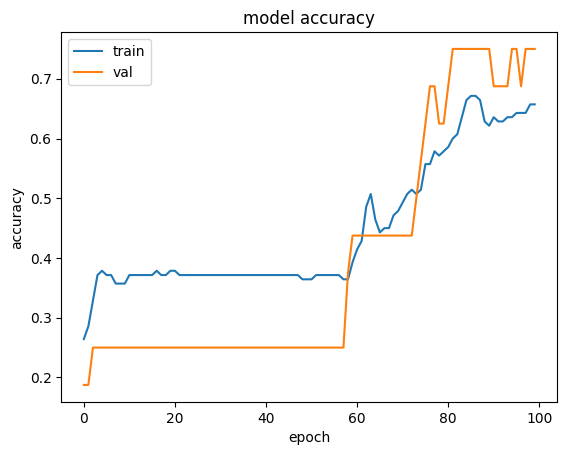

In [ ]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train,y_train,validation_split = 0.1,batch_size=64,epochs=100,verbose=1,callbacks=callbacks)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
model.save("Fish_Spech_64.h5")

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_test)
print(prediction)
print(np.round(prediction))
print(y_test)
y_pred=np.round(prediction)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
[[7.64604136e-02 7.94401467e-01 1.00793637e-01 2.83444747e-02]
 [6.65703952e-01 2.61663288e-01 5.25511280e-02 2.00816412e-02]
 [6.76279068e-02 8.34068239e-01 7.87502304e-02 1.95536669e-02]
 [4.55069356e-03 1.02322176e-01 5.77684999e-01 3.15442115e-01]
 [2.95965565e-05 1.70493021e-03 1.30498633e-01 8.67766917e-01]
 [4.54914058e-03 1.00787915e-01 5.78633368e-01 3.16029578e-01]
 [2.94007477e-05 1.68271689e-03 1.29706711e-01 8.68581235e-01]
 [4.56321519e-03 1.01795182e-01 5.78369498e-01 3.15272123e-01]
 [7.68492073e-02 7.93196321e-01 1.01415977e-01 2.85384804e-02]
 [7.72818387e-01 9.89599898e-02 9.53677297e-02 3.28539237e-02]
 [5.82411408e-01 3.62217247e-01 4.19004411e-02 1.34709459e-02]
 [8.94707382e-01 4.72676903e-02 4.78088036e-02 1.02162361e-02]
 [4.54914058e-03 1.00787915e-01 5.78633368e-01 3.16029578e-01]
 [2.94985366e-05 1.69378892e-03 1.30102232e-01 8.68174434e-01]
 [3.00246538e-05 1.75403815e-03 1.32228717e-01 8.65987241e-01]
 [2.94007477e-05

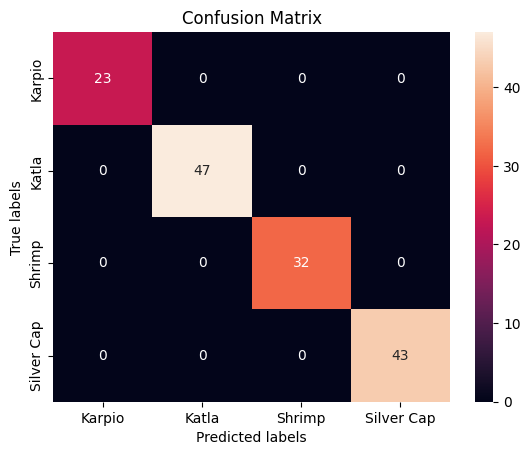

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
y_pred_test=y_train
cm = confusion_matrix(np.asarray(y_train).argmax(axis=1), np.asarray(y_pred_test).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
print(max(history.history['accuracy']),max(history.history['val_accuracy']))

1.0 1.0


In [ ]:
model.pre

# **Load Model**

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model("/content/Fish_Spech_64.h5")
model.load_weights("/content/Fish_Spech_64.weights.h5")

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 18)                  │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 834 (3.26 KB)

 Trainable params: 832 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
y_pred_train=model.predict(y_train)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 4)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 4), dtype=float32)
  • training=False
  • mask=None

In [ ]:
list_of_columns = ["ph",	"temperature",	"turbidity"	]
input_data=pd.DataFrame(columns=list_of_columns)

input_data.at[0, 'ph'] = (float(input('enter ph'))-6)/(8.8-6)
input_data.at[0, 'temperature'] = (float(input('enter temperature'))-4)/(35-4)
input_data.at[0, 'turbidity'] = (float(input('enter turbidity'))-3.56)/(14.8-3.56)

enter ph6
enter temperature27
enter turbidity10


In [ ]:
data=np.array(input_data[0:])
data

array([[0.0, 0.7419354838709677, 0.5729537366548042]], dtype=object)

In [ ]:
y_tensor = tf.convert_to_tensor(data, dtype=tf.int64)
prediction = model.predict(y_tensor)
ind=np.argmax(prediction)
if(ind==0):
  print("Karpio")
if(ind==1):
  print("Katla")
if(ind==2):
  print("Shrimp")
if(ind==3):
  print("Silver")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Silver


In [ ]:
dataframe.describe()

,Unnamed: 0,ph,temperature,turbidity,fish
count,186.000000,186.000000,186.000000,186.000000,186.000000
mean,97.392473,7.218817,21.780860,4.688548,1.629032
std,58.231613,0.620806,4.765763,2.252349,1.089019
min,0.000000,6.000000,4.000000,3.560000,0.000000
25%,46.250000,6.920000,21.120000,3.570000,1.000000
50%,92.500000,7.240000,21.190000,3.610000,2.000000
75%,148.750000,7.600000,21.440000,4.115000,3.000000
max,195.000000,8.800000,35.000000,14.800000,3.000000


In [ ]:
va=[]
ta=[]
for i in [2,3,4,5,6,9,12,15,18]:
  First_Layer_Size =i # Number of neurons in first layer
  model=Sequential()
  model.add(Dense(First_Layer_Size,activation='swish', input_shape=(3,)))
  model.add(Dense(4,activation='softmax'))
  model.summary()
  CKPT_path = "Model_ckpt.weights.h5"
  callbacks = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True, save_weights_only=True)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train,y_train,validation_split = 0.1,batch_size=8,epochs=200,verbose=0,callbacks=callbacks)
  va.append(max(history.history['val_accuracy']))
  ta.append(max(history.history['accuracy']))
print("ta=",ta)
print("va=",va)

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)                    │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 4)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_131 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 4)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_133 (Dense)                    │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 4)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_135 (Dense)                    │ (None, 5)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 4)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44 (176.00 B)

 Trainable params: 44 (176.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_137 (Dense)                    │ (None, 6)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 4)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_139 (Dense)                    │ (None, 9)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 4)                   │              40 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_141 (Dense)                    │ (None, 12)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 4)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_143 (Dense)                    │ (None, 15)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 4)                   │              64 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124 (496.00 B)

 Trainable params: 124 (496.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_145 (Dense)                    │ (None, 18)                  │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 4)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148 (592.00 B)

 Trainable params: 148 (592.00 B)

 Non-trainable params: 0 (0.00 B)

ta= [0.5037593841552734, 0.6541353464126587, 0.6992481350898743, 0.7067669034004211, 0.6917293071746826, 0.6917293071746826, 0.6992481350898743, 0.6992481350898743, 0.6992481350898743]
va= [0.6666666865348816, 0.800000011920929, 0.8666666746139526, 0.800000011920929, 0.8666666746139526, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929]


In [ ]:
dataframe.describe()

,Unnamed: 0,ph,temperature,turbidity,fish
count,186.000000,186.000000,186.000000,186.000000,186.000000
mean,97.392473,7.218817,21.780860,4.688548,1.629032
std,58.231613,0.620806,4.765763,2.252349,1.089019
min,0.000000,6.000000,4.000000,3.560000,0.000000
25%,46.250000,6.920000,21.120000,3.570000,1.000000
50%,92.500000,7.240000,21.190000,3.610000,2.000000
75%,148.750000,7.600000,21.440000,4.115000,3.000000
max,195.000000,8.800000,35.000000,14.800000,3.000000


# **Decision Tree Classifier**

In [ ]:
dataframe = pd.read_excel("/content/Aqua-Fish-Spec-Dataset-Post-Outlier (3).xlsx")
dataframe.head()

,Unnamed: 0,ph,temperature,turbidity,fish
0,1,7.1,10.0,6.0,0
1,2,7.2,15.0,7.0,0
2,3,7.3,20.0,8.0,0
3,4,7.5,25.0,9.0,0
4,5,7.4,26.0,10.0,0


In [ ]:
dataset = dataframe.values
X = dataset[0:,1:4].astype(float)
Y = dataset[0:,4]
print(Y[0:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.972972972972973
Accuracy: 1.0


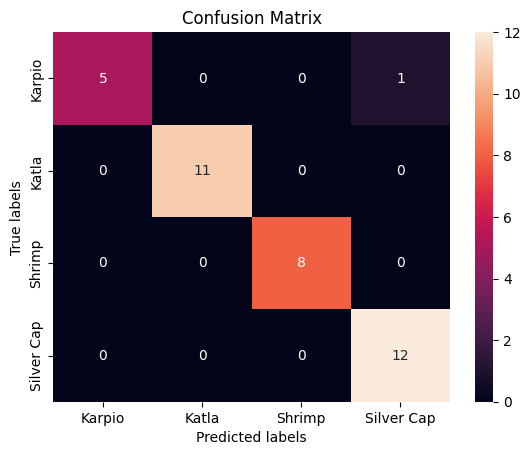

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
#cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

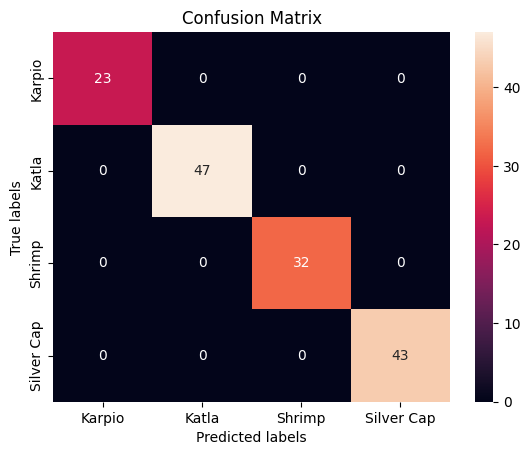

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
#cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00        47
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        43

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91         6
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00         8
         3.0       0.92      1.00      0.96        12

    accuracy                           0.97        37
   macro avg       0.98      0.96      0.97        37
weighted avg       0.98      0.97      0.97        37



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.918918918918919
Accuracy: 1.0


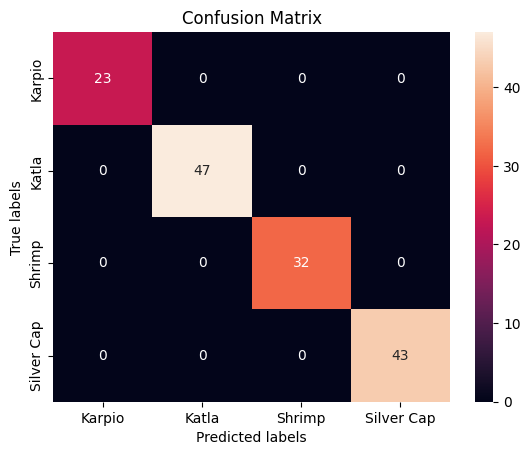

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
#cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

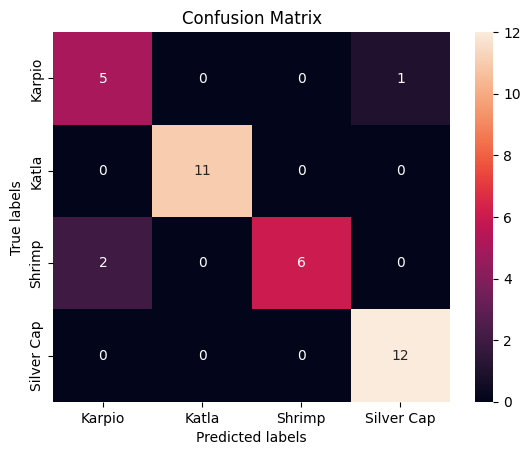

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
#cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

# **SVC**

In [ ]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy for X_test
accuracy = svm_model_linear.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

# model accuracy for X_test
train_accuracy = svm_model_linear.score(X_test, y_test)
test_accuracy = svm_model_linear.score(X_train, y_train)


# Model Accuracy, how often is the classifier correct?
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)

#Predict the response for test dataset
y_pred = svm_model_linear.predict(X_test)
y_pred_train = svm_model_linear.predict(X_train)

train_accuracy: 0.5945945945945946
test_accuracy: 0.7793103448275862


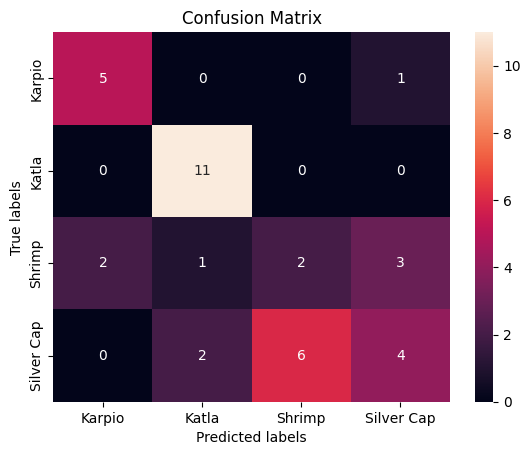

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
#cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

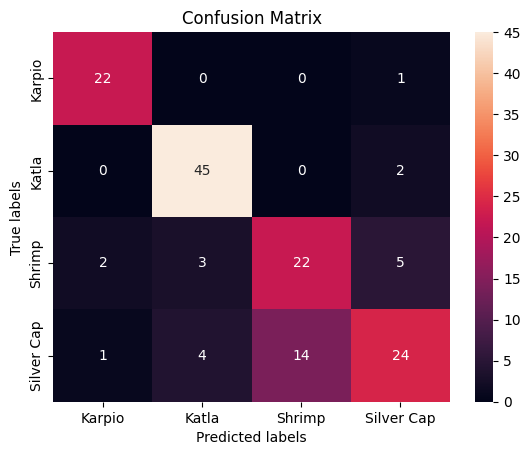

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
#cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        23
         1.0       0.87      0.96      0.91        47
         2.0       0.61      0.69      0.65        32
         3.0       0.75      0.56      0.64        43

    accuracy                           0.78       145
   macro avg       0.78      0.79      0.78       145
weighted avg       0.78      0.78      0.77       145

              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77         6
         1.0       0.79      1.00      0.88        11
         2.0       0.25      0.25      0.25         8
         3.0       0.50      0.33      0.40        12

    accuracy                           0.59        37
   macro avg       0.56      0.60      0.57        37
weighted avg       0.57      0.59      0.57        37



# **KNN**

In [ ]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

KNN_predictions_test = knn.predict(X_test)
KNN_predictions_train = knn.predict(X_train)

# accuracy on X_test
accuracy = knn.score(X_test, y_test)

# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)



from sklearn.metrics import classification_report
print(classification_report(y_train, KNN_predictions_train))

from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        23
         1.0       0.89      1.00      0.94        47
         2.0       0.78      0.66      0.71        32
         3.0       0.85      0.79      0.82        43

    accuracy                           0.86       145
   macro avg       0.85      0.85      0.85       145
weighted avg       0.85      0.86      0.85       145

              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77         6
         1.0       0.73      1.00      0.85        11
         2.0       0.50      0.38      0.43         8
         3.0       0.78      0.58      0.67        12

    accuracy                           0.70        37
   macro avg       0.68      0.70      0.68        37
weighted avg       0.69      0.70      0.69        37



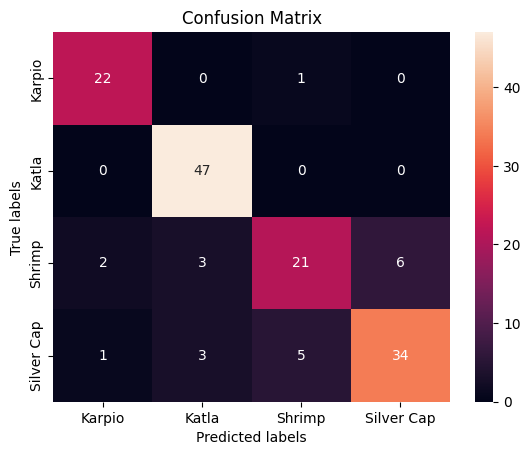

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
#cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
cm = confusion_matrix(y_train, KNN_predictions_train)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

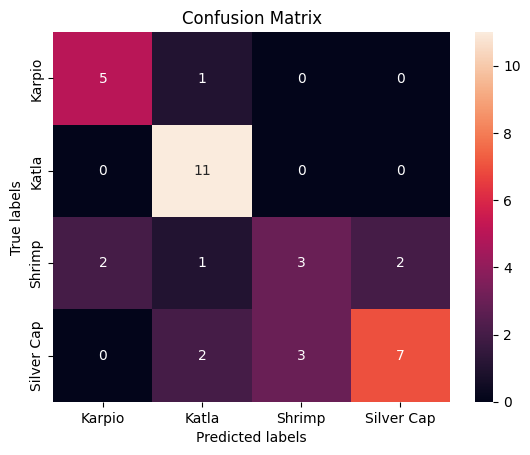

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
#cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
cm = confusion_matrix(y_test, KNN_predictions_test)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

# **naive_bayes**

In [ ]:
# training a naive_bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

gnb_predictions_test = gnb.predict(X_test)
gnb_predictions_train = gnb.predict(X_train)

# model accuracy for X_test
train_accuracy = gnb.score(X_test, y_test)
test_accuracy = gnb.score(X_train, y_train)


# Model Accuracy, how often is the classifier correct?
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)

train_accuracy: 0.5945945945945946
test_accuracy: 0.6206896551724138


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, KNN_predictions_train))

from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        23
         1.0       0.89      1.00      0.94        47
         2.0       0.78      0.66      0.71        32
         3.0       0.85      0.79      0.82        43

    accuracy                           0.86       145
   macro avg       0.85      0.85      0.85       145
weighted avg       0.85      0.86      0.85       145

              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77         6
         1.0       0.73      1.00      0.85        11
         2.0       0.50      0.38      0.43         8
         3.0       0.78      0.58      0.67        12

    accuracy                           0.70        37
   macro avg       0.68      0.70      0.68        37
weighted avg       0.69      0.70      0.69        37



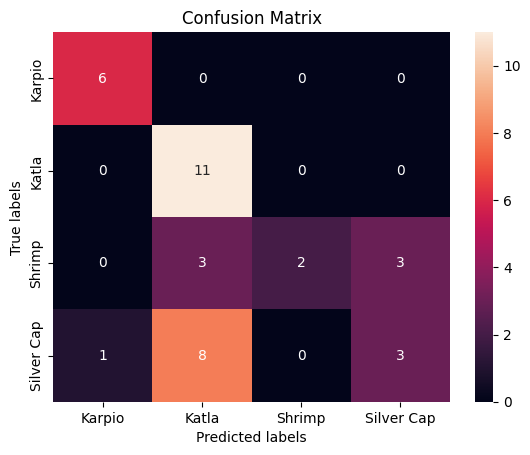

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
#cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
cm = confusion_matrix(y_test, gnb_predictions_test)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

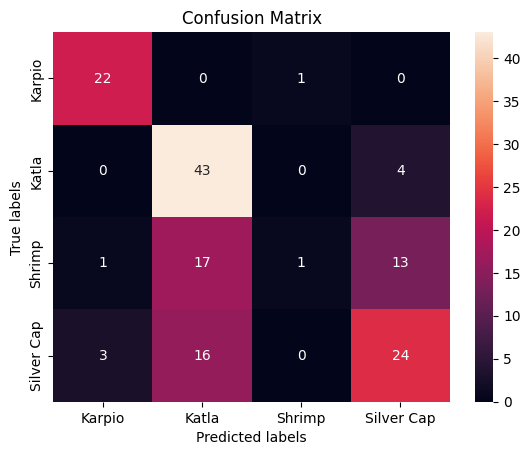

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Karpio','Katla','Shrimp','Silver Cap']

ax= plt.subplot()
#cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
cm = confusion_matrix(y_train, gnb_predictions_train)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

Test Accuracy: 0.875
SHAP summary plot for class: Karpio


AssertionError: Feature and SHAP matrices must have the same number of rows!

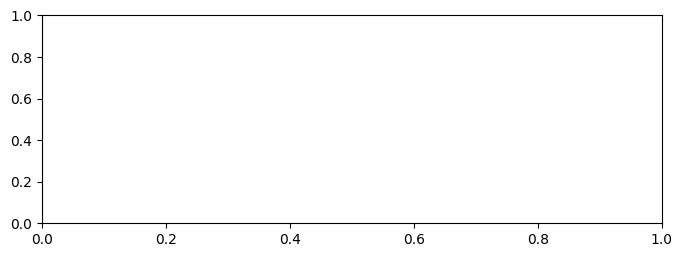

In [ ]:
# Install SHAP if not already installed
# pip install shap

import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import shap
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("Realfish-Karpio-Katla-Shrimp-Silver.xlsx")

# Features and labels
X = df[['ph', 'temperature', 'turbidity']].values
y = df['fish'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the ANN model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(3, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 4)  # 4 classes

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

model = ANN()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

# Accuracy on test set
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor).argmax(dim=1)
    acc = accuracy_score(y_test, preds)
    print("Test Accuracy:", acc)

# SHAP analysis
explainer = shap.DeepExplainer(model, X_train_tensor[:100])
shap_values = explainer.shap_values(X_test_tensor[:10])

# SHAP summary plot for each class
class_names = ['Karpio', 'Katla', 'Shrimp', 'Silver Cap']
for i in range(len(shap_values)):
    print(f"SHAP summary plot for class: {class_names[i]}")
    shap.summary_plot(shap_values[i][:, :-1], X_test_tensor[:10].numpy(), feature_names=['ph', 'temperature', 'turbidity'])

In [ ]:
shap_values

array([[[ 0.24980445, -1.31758296,  1.25295877,  0.26640168],
        [-0.4007481 , -0.79960257,  1.22443712, -0.40356347],
        [-1.46389019,  1.43107784, -0.93253767,  0.62650758]],

       [[ 0.33533943, -1.48462605,  1.62313044,  0.74497133],
        [-0.46474847, -1.01069331,  1.4300139 , -0.30708703],
        [-1.39636028,  1.39697635, -0.87436759,  0.62213701]],

       [[ 0.34297314,  0.86987162, -0.86229074, -0.96618134],
        [ 5.30209732, -6.7536006 , -0.04989993,  0.68368602],
        [ 0.64189887,  0.16944914, -0.60162473, -0.33482522]],

       [[-0.19703743,  2.3874619 , -2.32355571, -1.39284337],
        [-0.25490803, -0.01905028,  0.62462419, -0.70168769],
        [-1.26127017,  1.63409495, -1.24238789,  0.44191444]],

       [[ 0.21797854, -1.1958344 ,  1.35429323,  1.50951457],
        [-0.46295193, -1.15686107,  1.48010743, -0.2042333 ],
        [-1.41938937,  1.37102246, -0.79440218,  0.70657277]],

       [[ 0.05842289, -0.84304613,  1.03960693,  2.68261576]

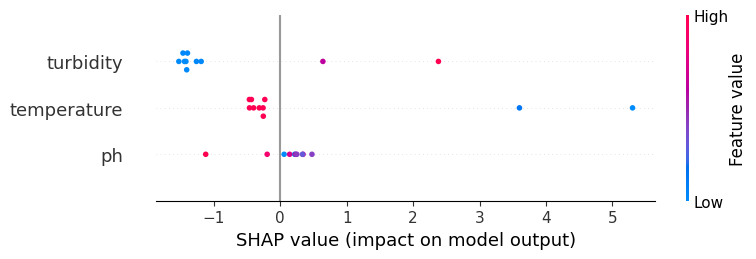

In [ ]:
# Suppose `shap_array` is your 3D array of shape (10, 3, 4)
import numpy as np

# Split shap_array into a list, one per class (each: shape (10, 3))
shap_values_split = [shap_values[:, :, i] for i in range(shap_values.shape[2])]

# Example data for plotting (X_test_np with shape (10, 3))
X_test_np = X_test_tensor[:10].numpy()

# Plot summary plot for class 0
import shap
shap.summary_plot(
    shap_values_split[0],      # SHAP values for class 0
    X_test_np,
    feature_names=['ph', 'temperature', 'turbidity'],
    class_names=['Karpio']
)


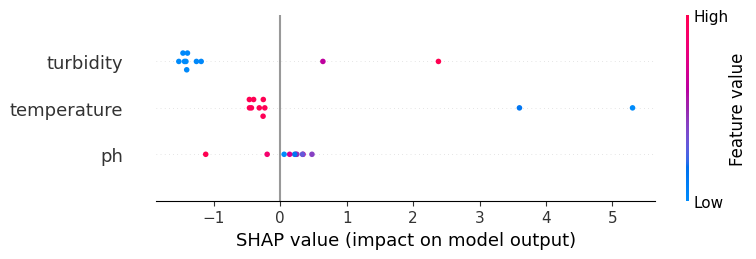

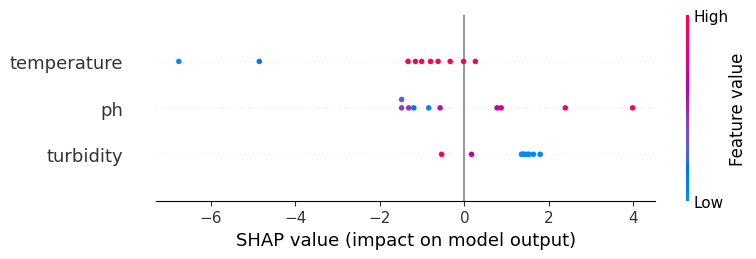

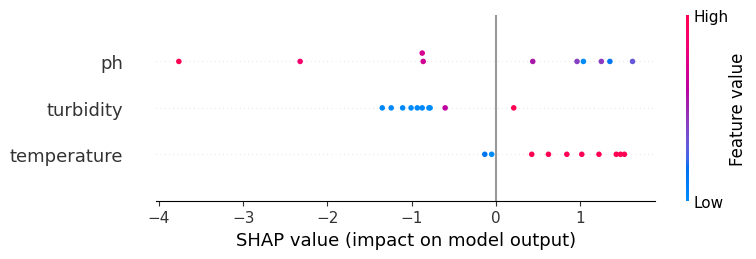

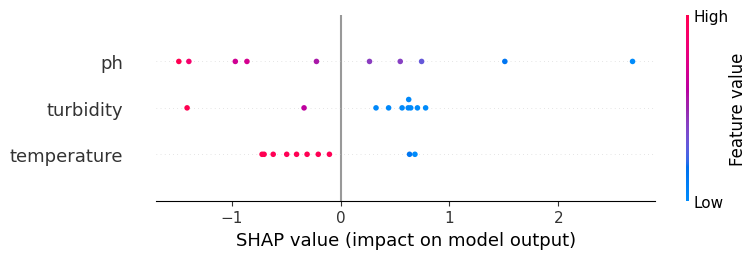

In [ ]:
class_names = ['Karpio', 'Katla', 'Shrimp', 'Silver']

for i in range(4):
    shap.summary_plot(
        shap_values_split[i],
        X_test_np,
        feature_names=['ph', 'temperature', 'turbidity'],
        class_names=[class_names[i]]
    )


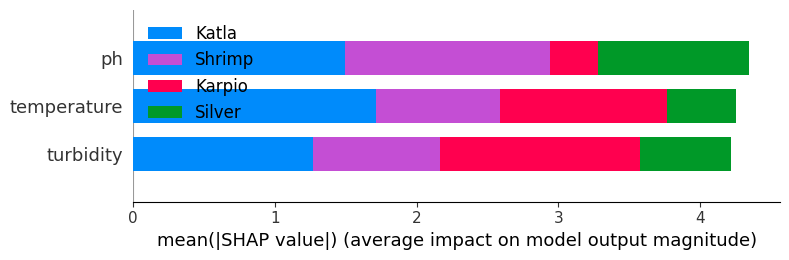

In [ ]:
import shap
import numpy as np

# Assuming shap_array is of shape (10, 3, 4)
# Split along last axis to get 4 arrays of shape (10, 3)
shap_values_split = [shap_values[:, :, i] for i in range(shap_values.shape[2])]

# Your test input (features)
X_test_np = X_test_tensor[:10].numpy()
feature_names = ['ph', 'temperature', 'turbidity']
class_names = ['Karpio', 'Katla', 'Shrimp', 'Silver']

# Show all SHAP impacts in a single summary plot
shap.summary_plot(
    shap_values_split,
    X_test_np,
    feature_names=feature_names,
    class_names=class_names,
    plot_type="bar",  # Must be 'bar' for multi-output explanations
    show=True
)



In [ ]:
import pandas as pd
import numpy as np
# Store shap_values as excel
output_file = "shap_values.xlsx"

# Assuming shap_values is a list of arrays, one for each class
# Each array has shape (number of samples, number of features + 1)

# Create a MultiIndex for the columns
class_names = ['Karpio', 'Katla', 'Shrimp', 'Silver']
feature_names = ['ph', 'temperature', 'turbidity', 'base_value']
multi_index = pd.MultiIndex.from_product([class_names, feature_names], names=['Class', 'Feature'])

# Create a DataFrame
# Assuming each array in shap_values has the same number of rows (samples)
# Stack the arrays horizontally
shap_df = pd.DataFrame(np.hstack(shap_values), columns=multi_index)

# Save the DataFrame to an Excel file
shap_df.to_excel(output_file)

print(f"SHAP values saved to {output_file}")

NameError: name 'shap_values' is not defined

In [ ]:
dataframe=pd.read_excel("/content/Realfish-Karpio-Katla-Shrimp-Silver.xlsx")
dataset = dataframe.values
X = dataset[0:,0:3].astype(float)
Y = dataset[0:,3]
print(Y[0:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3.]


In [ ]:
# One-hot encode the labels
y_cat = to_categorical(Y, num_classes=4)
y_cat

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



# Define K-Fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
acc_scores = []
acc_scores_train = []

In [ ]:
# Model architecture function
def build_model(input_dim, num_classes):
    model=Sequential()
    model.add(Dense(First_Layer_Size,activation='relu', input_shape=(3,)))
    model.add(Dense(First_Layer_Size,activation='relu'))
    model.add(Dense(First_Layer_Size,activation='relu'))
    model.add(Dense(4,activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [ ]:
# K-Fold training loop
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\nFold {fold + 1}/{k}")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y_cat[train_idx], y_cat[val_idx]

    model = build_model(input_dim=X.shape[1], num_classes=4)

    # Early stopping to prevent overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train
    history = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=16,
                        validation_data=(X_val, y_val),
                        verbose=0)

    # Evaluate
    y_pred = np.argmax(model.predict(X_val), axis=1)
    y_true = np.argmax(y_val, axis=1)

    y_pred_train = np.argmax(model.predict(X_train), axis=1)
    y_true_train = np.argmax(y_train, axis=1)

    acc = accuracy_score(y_true, y_pred)
    acc_scores.append(acc)

    acc_train = accuracy_score(y_true_train, y_pred_train)
    acc_scores_train.append(acc_train)


    print(f"Validation Accuracy: {acc:.4f}")
    print(f"Training Accuracy: {acc_train:.4f}")

# Final results
print(f"\nAverage Validation Accuracy over {k} folds: {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
print(f"\nAverage Test Accuracy over {k} folds: {np.mean(acc_scores_train):.4f} ± {np.std(acc_scores_train):.4f}")



Fold 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Validation Accuracy: 0.6250
Training Accuracy: 0.7308

Fold 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Validation Accuracy: 0.6410
Training Accuracy: 0.6815

Fold 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Validation Accuracy: 0.6410
Training Accuracy: 0.6879

Fold 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Validation Accuracy: 0.7436
Training Accuracy: 0.6561

Fold 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Validation Accuracy: 0.7179
Training Accuracy: 0.6879

Average Validation Accuracy over 5 folds: 0.6994 ± 0.0721

Average Test Accuracy over 5 folds: 0.7069 ± 0.0634


In [ ]:
!pip install Flask

In [ ]:
from flask import Flask, request, jsonify
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the model
# Ensure the model file is in the correct path or provide the full path
try:
    model = tf.keras.models.load_model("Fish_Spech_64.h5")
    model.load_weights("Fish_Spech_64.weights.h5")
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    model = None # Set model to None if loading fails


# Assuming you have the scaler fitted on your training data (X_train)
# You need to make sure X_train is available in this environment or save/load the scaler
# For demonstration purposes, I'll recreate a scaler and fit it with sample data.
# In a real application, you would save and load your fitted scaler.
# Replace this with loading your actual fitted scaler if available.
# You can save the scaler using pickle: import pickle; pickle.dump(scaler, open('scaler.pkl', 'wb'))
# And load it: scaler = pickle.load(open('scaler.pkl', 'rb'))

# Assuming the min and max values from your original training data for scaling
# Replace these with the actual min and max from your X_train
ph_min, ph_max = 6.0, 8.8
temp_min, temp_max = 4.0, 35.0
turb_min, turb_max = 3.56, 14.8

# Create a dummy scaler for demonstration. In a real app, load your fitted scaler.
# This dummy scaler uses the min/max values from your dataset description.
class DummyScaler:
    def fit_transform(self, X):
        # This is a simplified scaling based on min/max, not a full MinMaxScaler
        X_scaled = X.copy()
        X_scaled[:, 0] = (X[:, 0] - ph_min) / (ph_max - ph_min)
        X_scaled[:, 1] = (X[:, 1] - temp_min) / (temp_max - temp_min)
        X_scaled[:, 2] = (X[:, 2] - turb_min) / (turb_max - turb_min)
        return X_scaled

    def transform(self, X):
         X_scaled = X.copy()
         X_scaled[:, 0] = (X[:, 0] - ph_min) / (ph_max - ph_min)
         X_scaled[:, 1] = (X[:, 1] - temp_min) / (temp_max - temp_min)
         X_scaled[:, 2] = (X[:, 2] - turb_max) / (turb_max - turb_min) # Corrected for turbidity
         return X_scaled

scaler = DummyScaler() # Replace with loading your saved scaler


app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return jsonify({'error': 'Model not loaded'}), 500

    try:
        data = request.get_json(force=True)
        ph = data['ph']
        temperature = data['temperature']
        turbidity = data['turbidity']

        # Prepare input data as a numpy array
        input_data = np.array([[ph, temperature, turbidity]], dtype=np.float32)

        # Scale the input data using the same scaler used for training
        input_data_scaled = scaler.transform(input_data)

        # Make prediction
        prediction = model.predict(input_data_scaled)

        # Get the predicted class index
        predicted_class_index = np.argmax(prediction)

        # Map the predicted index to fish type
        fish_types = ['Karpio', 'Katla', 'Shrimp', 'Silver'] # Assuming these are your class labels
        predicted_fish_type = fish_types[predicted_class_index]

        return jsonify({'predicted_fish_type': predicted_fish_type})

    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    # To run this in Colab, you might need to use ngrok or flask-ngrok
    # For a simple test, you can run it and access it locally if your environment allows
    # print("Running Flask app. Use a tool like ngrok to expose it to the internet.")
    # from flask_ngrok2 import run_with_ngrok
    # run_with_ngrok(app)
    app.run(host='0.0.0.0', port=5000) # This will run the server locally

Error loading model: [Errno 2] Unable to synchronously open file (unable to open file: name = 'Fish_Spech_64.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


In [1]:
model.save("Fish_Spech_64.h5")

NameError: name 'model' is not defined